# Работа с данными в Python

Данные обычно хранятся в виде **таблиц** (MS Excel, базы данных SQL, Hadoop MapReduce и т.д.)

Примеры операций с данными:
1. чтение и запись
2. просмотр (столбцы, строки, названия) и индексация
3. статистика, агрегатные функции
4. расчет новых значений
5. добавление/изменение/удаление строк и столбцов
6. поиск и фильтрация
7. сортировка
8. визуализация
9. переименование строк/столбцов
10. объединение нескольких таблиц
11. группировка значений и агрегация

## Формат CSV

**C**omma **S**eparated **V**alues – "значения, разделенные запятыми" (или другим разделителем).

В качестве примера рассмотрим набор данных с подробным описанием жилых домов в штате Айова, США (источник: соревнование [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на платформе [Kaggle](https://www.kaggle.com)).

In [1]:
with open('train.csv', 'r') as datafile:
    data_lines = datafile.read().splitlines()

In [4]:
print(data_lines[0])

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [5]:
print(data_lines[1])

1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500


## Библиотека Pandas

[Pandas](http://pandas.pydata.org) не является частью языка Python. В Anaconda уже установлена, а в обычном Python нужно установить:

In [6]:
import pandas as pd

In [7]:
pd.

SyntaxError: invalid syntax (<ipython-input-7-bc888235687a>, line 1)

In [9]:
print(pd.__version__)

0.23.4


Важные "сущности":
- `pd.DataFrame` – таблица (двумерные данные)
- `pd.Series` – столбец/строка (одномерные данные)
- `pd.Index` – индекс (список названий строк/столбцов)

## Чтение/запись таблицы из файла CSV

Важные параметры:
- `sep=','` – разделитель (бывает `'\t'`, `';'`, `' '` и т.д.)
- `decimal='.'` – символ, отделяющий дробную часть (в русской локали бывает `','`)
- `encoding='utf8'` – кодировка (в Windows часто бывает `'cp1251'`)

In [10]:
df = pd.read_csv('train.csv', nrows=10)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.to_csv('train_head.csv')

## Просмотр таблицы и индексация

In [13]:
df = pd.read_csv('train.csv', nrows=100, index_col='Id')

### Часть таблицы

In [14]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [15]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,352,0,0,0,0,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950


In [18]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,...,192,151,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,...,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,...,301,0,0,0,0,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,...,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,...,49,0,87,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500


### Индекс и названия столбцов

In [19]:
df.shape

(100, 80)

In [20]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='Id')

In [21]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [22]:
df.sample(5).index

Int64Index([33, 58, 90, 46, 92], dtype='int64', name='Id')

In [23]:
df.T

Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60,20,20,20,...,60,60,160,50,20,20,20,30,190,60,60,20,20,30,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL,RL,RL,...,RL,RL,FV,C (all),RL,RL,RL,RL,C (all),RL,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85,NaN,91,NaN,...,121,122,40,105,60,60,85,80,60,69,NaN,78,73,85,77
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924,12968,10652,10920,...,16059,11911,3951,8470,8070,7200,8500,13360,7200,9337,9765,10264,10921,10625,9320
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,2,7,9,8,5,...,4,3,6,10,8,7,12,8,11,5,4,8,5,5,1
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,2008,2006,2008,2007,2008,...,2006,2009,2009,2009,2007,2006,2006,2009,2007,2007,2009,2006,2007,2010,2010
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,New,WD,New,WD,...,WD,WD,New,ConLD,WD,WD,WD,WD,WD,WD,WD,WD,WD,COD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,Normal,Partial,Normal,Partial,Normal,...,Normal,Normal,Partial,Abnorml,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal,Abnorml,Normal


In [25]:
print(df.T.shape)
print(df.T.columns)

(80, 100)
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='Id')


### Базовая индексация

[Официальная документация](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

#### Столбцы

In [26]:
df['SalePrice']

Id
1      208500
2      181500
3      223500
4      140000
5      250000
        ...  
96     185000
97     214000
98      94750
99      83000
100    128950
Name: SalePrice, Length: 100, dtype: int64

In [27]:
type(df['SalePrice'])

pandas.core.series.Series

In [28]:
df['SalePrice'].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='Id')

In [34]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [33]:
df.SaleCondition

Id
1       Normal
2       Normal
3       Normal
4      Abnorml
5       Normal
        ...   
96      Normal
97      Normal
98      Normal
99     Abnorml
100     Normal
Name: SaleCondition, Length: 100, dtype: object

In [35]:
df[['SaleType', 'SalePrice']]

,SaleType,SalePrice
Id,,
1,WD,208500
2,WD,181500
3,WD,223500
4,WD,140000
5,WD,250000
...,...,...
96,WD,185000
97,WD,214000
98,WD,94750


#### Строки

In [36]:
df.loc[1]

MSSubClass           60
MSZoning             RL
LotFrontage          65
LotArea            8450
Street             Pave
                  ...  
MoSold                2
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        208500
Name: 1, Length: 80, dtype: object

In [37]:
type(df.loc[1])

pandas.core.series.Series

In [38]:
df.loc[1].index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [42]:
df.loc[[1, 3, 4]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


#### Столбцы и строки

Если оба индекса – значения, то получаем один объект:

In [43]:
df.loc[3, 'YrSold']

2008

Если один из индексов – список значений, то получаем `Series`:

In [44]:
df.loc[[1, 3, 4], 'SalePrice']

Id
1    208500
3    223500
4    140000
Name: SalePrice, dtype: int64

Если оба индекса – списки значений, то получаем `DataFrame`:

In [45]:
df.loc[[1, 3, 4], ['SalePrice', 'YrSold']]

,SalePrice,YrSold
Id,,
1,208500,2008
3,223500,2008
4,140000,2006


Вместо списков могут быть срезы (`slice`):

In [46]:
df.loc[1:3, 'YrSold']

Id
1    2008
2    2007
3    2008
Name: YrSold, dtype: int64

In [48]:
df.loc[:5, 'YrSold':'SalePrice']

,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,
1,2008,WD,Normal,208500
2,2007,WD,Normal,181500
3,2008,WD,Normal,223500
4,2006,WD,Abnorml,140000
5,2008,WD,Normal,250000


Важное отличие от обычных питоновских срезов: срез берется до правого конца **включительно**.

#### Индексация по номерам

In [49]:
df.iloc[0]

MSSubClass           60
MSZoning             RL
LotFrontage          65
LotArea            8450
Street             Pave
                  ...  
MoSold                2
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        208500
Name: 1, Length: 80, dtype: object

In [50]:
df.iloc[0, :4]

MSSubClass       60
MSZoning         RL
LotFrontage      65
LotArea        8450
Name: 1, dtype: object

In [51]:
df.iloc[-3:, -1]

Id
98      94750
99      83000
100    128950
Name: SalePrice, dtype: int64

В этом случае срезы работают как стандартные – исключая правый конец.

#### Резюме

- `df[•]` для столбцов (или `df.•`)
- `df.loc[•]` для строк
- `df.loc[•, •]` для строк и столбцов
- `df.iloc[•, •]` для доступа по номерам

## Информация о таблице

In [52]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 80 columns):
MSSubClass       100 non-null int64
MSZoning         100 non-null object
LotFrontage      86 non-null float64
LotArea          100 non-null int64
Street           100 non-null object
Alley            6 non-null object
LotShape         100 non-null object
LandContour      100 non-null object
Utilities        100 non-null object
LotConfig        100 non-null object
LandSlope        100 non-null object
Neighborhood     100 non-null object
Condition1       100 non-null object
Condition2       100 non-null object
BldgType         100 non-null object
HouseStyle       100 non-null object
OverallQual      100 non-null int64
OverallCond      100 non-null int64
YearBuilt        100 non-null int64
YearRemodAdd     100 non-null int64
RoofStyle        100 non-null object
RoofMatl         100 non-null object
Exterior1st      100 non-null object
Exterior2nd      100 non-null object
MasVnrType     

In [53]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,86.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,94.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.00000,100.000000
mean,52.000000,71.406977,10115.870000,5.980000,5.50000,1971.410000,1983.920000,121.640000,454.560000,33.910000,558.790000,1047.260000,1143.530000,297.210000,8.730000,...,0.530000,1977.361702,1.750000,466.370000,93.820000,46.900000,24.130000,7.270000,10.160000,0.0,NaN,46.300000,6.330000,2007.90000,173820.660000
std,42.545282,21.093840,5130.541763,1.530696,0.97959,29.373284,20.967353,213.553982,462.034922,131.575158,448.599196,408.500303,343.400213,436.049768,62.372918,...,0.626921,26.604572,0.757121,199.121082,139.576877,59.743306,60.211019,51.518724,46.908835,0.0,NaN,153.692958,3.048613,1.35959,72236.552886
min,20.000000,21.000000,1596.000000,3.000000,2.00000,1910.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.00000,40000.000000
25%,20.000000,60.000000,7643.250000,5.000000,5.00000,1954.750000,1964.750000,0.000000,0.000000,0.000000,203.000000,822.000000,901.500000,0.000000,0.000000,...,0.000000,1961.250000,1.000000,352.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.750000,2007.00000,129362.500000
50%,45.000000,70.000000,9595.500000,6.000000,5.00000,1970.000000,1994.000000,0.000000,416.000000,0.000000,440.000000,1034.500000,1091.500000,0.000000,0.000000,...,0.000000,1979.000000,2.000000,480.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.00000,153750.000000
75%,60.000000,84.000000,11243.250000,7.000000,6.00000,2000.250000,2003.250000,188.500000,737.500000,0.000000,820.000000,1268.500000,1325.000000,686.000000,0.000000,...,1.000000,2002.750000,2.000000,576.000000,149.750000,72.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.00000,207750.000000
max,190.000000,122.000000,50271.000000,10.000000,8.00000,2009.000000,2009.000000,1115.000000,1880.000000,712.000000,1777.000000,2223.000000,2223.000000,1519.000000,513.000000,...,2.000000,2009.000000,3.000000,894.000000,857.000000,258.000000,272.000000,407.000000,291.000000,0.0,NaN,700.000000,12.000000,2010.00000,438780.000000


## Статистика и агрегатные функции

### Статистики для `Series`

Например, для столбцов:

In [54]:
df.LotArea.count()

100

In [55]:
df.LotFrontage.count()

86

In [56]:
df.LotArea.min()

1596

In [57]:
df.LotArea.max()

50271

In [58]:
df.LotArea.mean()

10115.87

In [59]:
df.LotArea.median()

9595.5

In [60]:
df.LotArea.std()

5130.541762904683

In [61]:
df.LotArea.var()

26322458.780909095

In [62]:
df.LotArea.quantile(0.25)

7643.25

In [63]:
df.LotArea.quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00     1596.00
0.25     7643.25
0.50     9595.50
0.75    11243.25
1.00    50271.00
Name: LotArea, dtype: float64

In [64]:
df.LotArea.sum()

1011587

Можно и для строк (и вообще для любых `Series`):

In [65]:
df.loc[1].count()

75

### Статистики для `DataFrame`

Вызывается так же, считается по умолчанию для каждого столбца ("вдоль строк"):

In [66]:
df.count()

MSSubClass       100
MSZoning         100
LotFrontage       86
LotArea          100
Street           100
                ... 
MoSold           100
YrSold           100
SaleType         100
SaleCondition    100
SalePrice        100
Length: 80, dtype: int64

Можно посчитать и для каждой строки ("вдоль столбцов"):

In [67]:
df.count(axis=1)

Id
1      75
2      76
3      76
4      76
5      76
       ..
96     76
97     75
98     75
99     76
100    71
Length: 100, dtype: int64

In [68]:
df[['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea']].sum(axis=1)

Id
1      10904
2      11322
3      13806
4      11909
5      17644
       ...  
96     11723
97     12507
98     12361
99     11826
100    10545
Length: 100, dtype: int64

### Уникальные значения

In [70]:
df.Neighborhood.value_counts()

NAmes      21
CollgCr    14
NridgHt     9
OldTown     7
Sawyer      7
           ..
Veenker     2
StoneBr     1
NWAmes      1
ClearCr     1
Timber      1
Name: Neighborhood, Length: 20, dtype: int64

In [71]:
df.Alley.value_counts(dropna=False)

NaN     94
Pave     3
Grvl     3
Name: Alley, dtype: int64

In [72]:
df.Alley.value_counts(dropna=False, normalize=True)

NaN     0.94
Pave    0.03
Grvl    0.03
Name: Alley, dtype: float64

In [73]:
df.Neighborhood.nunique()

20

In [74]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr'], dtype=object)

## Расчет новых значений ("формулы")

### Арифметические операции

Бинарные операции со скаляром (одним значением) работают покомпонентно:

In [75]:
2 * df.LotArea

Id
1      16900
2      19200
3      22500
4      19100
5      28520
       ...  
96     19530
97     20528
98     21842
99     21250
100    18640
Name: LotArea, Length: 100, dtype: int64

In [76]:
df.LotArea - 1000

Id
1       7450
2       8600
3      10250
4       8550
5      13260
       ...  
96      8765
97      9264
98      9921
99      9625
100     8320
Name: LotArea, Length: 100, dtype: int64

In [77]:
(df.LotArea - df.LotArea.mean()) / df.LotArea.std()

Id
1     -0.324697
2     -0.100549
3      0.221055
4     -0.110294
5      0.807737
         ...   
96    -0.068388
97     0.028872
98     0.156929
99     0.099235
100   -0.155124
Name: LotArea, Length: 100, dtype: float64

Те же операции работают и для двух `Series`:

In [78]:
df.SalePrice / df.LotArea

Id
1      24.674556
2      18.906250
3      19.866667
4      14.659686
5      17.531557
         ...    
96     18.945212
97     20.849571
98      8.675945
99      7.811765
100    13.835837
Length: 100, dtype: float64

In [79]:
df.LotArea + df.GarageArea

Id
1       8998
2      10060
3      11858
4      10192
5      15096
       ...  
96     10185
97     10736
98     11353
99     10991
100     9320
Length: 100, dtype: int64

### Проверка условий

In [80]:
df.LotArea > 10000

Id
1      False
2      False
3       True
4      False
5       True
       ...  
96     False
97      True
98      True
99      True
100    False
Name: LotArea, Length: 100, dtype: bool

In [81]:
df.SaleCondition == 'Normal'

Id
1       True
2       True
3       True
4      False
5       True
       ...  
96      True
97      True
98      True
99     False
100     True
Name: SaleCondition, Length: 100, dtype: bool

In [82]:
df.GarageYrBlt > df.YearBuilt

Id
1      False
2      False
3      False
4       True
5      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 100, dtype: bool

In [83]:
df.Fence.isnull()

Id
1      True
2      True
3      True
4      True
5      True
       ... 
96     True
97     True
98     True
99     True
100    True
Name: Fence, Length: 100, dtype: bool

In [84]:
df.Fence.notnull()

Id
1      False
2      False
3      False
4      False
5      False
       ...  
96     False
97     False
98     False
99     False
100    False
Name: Fence, Length: 100, dtype: bool

In [85]:
df.LotConfig.isin(['Inside', 'Corner'])

Id
1       True
2      False
3       True
4       True
5      False
       ...  
96      True
97      True
98      True
99      True
100     True
Name: LotConfig, Length: 100, dtype: bool

In [86]:
~df.LotConfig.isin(['Inside', 'Corner'])  # "not"

Id
1      False
2       True
3      False
4      False
5       True
       ...  
96     False
97     False
98     False
99     False
100    False
Name: LotConfig, Length: 100, dtype: bool

In [87]:
(df.SalePrice < 100000) & (df.LotArea > 10000)  # "and"

Id
1      False
2      False
3      False
4      False
5      False
       ...  
96     False
97     False
98      True
99      True
100    False
Length: 100, dtype: bool

In [88]:
(df.SalePrice < 100000) | (df.LotArea > 10000)  # "or"

Id
1      False
2      False
3       True
4      False
5       True
       ...  
96     False
97      True
98      True
99      True
100    False
Length: 100, dtype: bool

### Более сложная математика

In [89]:
df.SalePrice**2

Id
1      43472250000
2      32942250000
3      49952250000
4      19600000000
5      62500000000
          ...     
96     34225000000
97     45796000000
98      8977562500
99      6889000000
100    16628102500
Name: SalePrice, Length: 100, dtype: int64

На самом деле, `pandas` использует внутри себя более низкоуровневую библиотеку `numpy` для научных вычислений, поэтому можно пользоваться математическими операциями из этой библиотеки:

In [90]:
import numpy as np

In [91]:
np.sqrt(df.LotArea)

Id
1       91.923882
2       97.979590
3      106.066017
4       97.724101
5      119.415242
          ...    
96      98.818015
97     101.311401
98     104.503588
99     103.077641
100     96.540147
Name: LotArea, Length: 100, dtype: float64

In [92]:
np.log(df.SalePrice)

Id
1      12.247694
2      12.109011
3      12.317167
4      11.849398
5      12.429216
         ...    
96     12.128111
97     12.273731
98     11.458997
99     11.326596
100    11.767180
Name: SalePrice, Length: 100, dtype: float64

### Расчет произвольных функций

Для `Series`:

In [93]:
def price_class(price):
    return 'Low' if price < 200000 else 'High'

In [94]:
df.SalePrice.apply(price_class)

Id
1      High
2       Low
3      High
4       Low
5      High
       ... 
96      Low
97     High
98      Low
99      Low
100     Low
Name: SalePrice, Length: 100, dtype: object

Для `DataFrame`:

In [95]:
def interesting(row):
    if (row['PoolArea'] > 0) and (row['SalePrice'] < 250000):
        return 'Interesting, has pool'
    elif row['SalePrice'] < 200000:
        return 'Interesting, no pool'
    else:
        return 'Too expensive'

In [96]:
df.apply(interesting, axis=1)

Id
1             Too expensive
2      Interesting, no pool
3             Too expensive
4      Interesting, no pool
5             Too expensive
               ...         
96     Interesting, no pool
97            Too expensive
98     Interesting, no pool
99     Interesting, no pool
100    Interesting, no pool
Length: 100, dtype: object

Вопрос: зачем пользоваться покомпонентными операциями и функциями, если можно сделать `apply`?

In [97]:
%%timeit
df.SalePrice**2

113 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [98]:
%%timeit
df.SalePrice.apply(lambda x: x**2)

316 µs ± 8.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Добавление/изменение строк/столбцов

### Столбцы

Используем индексацию и правила расчета формул:

In [99]:
df['PricePerArea'] = df.SalePrice / df.LotArea

In [100]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945


In [101]:
df['VeryUsefulColumn'] = 0

In [102]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea,VeryUsefulColumn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212,0
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571,0
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945,0


In [103]:
df.loc[[1, 3, 4], 'VeryUsefulColumn'] = 1

In [104]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea,VeryUsefulColumn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,1
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,1
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,1
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212,0
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571,0
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945,0


In [105]:
df.loc[[1, 3, 4], 'VeryUsefulColumn'] = [2, 4, 6]

In [106]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea,VeryUsefulColumn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,2
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,4
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,6
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212,0
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571,0
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945,0


In [107]:
df.loc[[1, 3, 4], 'VeryUsefulColumn'] = df.SalePrice

In [108]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea,VeryUsefulColumn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212,0
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571,0
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945,0


### Строки

In [109]:
df.loc[40] = 0

In [110]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea,VeryUsefulColumn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212,0
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571,0
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945,0


In [111]:
df.loc['count'] = df.count()

In [112]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea,VeryUsefulColumn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571,0
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945,0
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000,7.811765,0


In [113]:
df.index

Index([      1,       2,       3,       4,       5,       6,       7,       8,
             9,      10,
       ...
            92,      93,      94,      95,      96,      97,      98,      99,
           100, 'count'],
      dtype='object', name='Id', length=101)

## Удаление строк/столбцов

### Столбцы

In [114]:
df.drop('VeryUsefulColumn', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000,7.811765


In [115]:
df.drop(['PricePerArea', 'VeryUsefulColumn'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [116]:
df.drop(['PricePerArea', 'VeryUsefulColumn'], axis=1, inplace=True)

In [117]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


### Строки

In [118]:
df.drop(40, axis=0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [119]:
df.drop([40, 'count'], axis=0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


In [120]:
df.drop([40, 'count'], axis=0, inplace=True)

In [121]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


### Удаление дубликатов

In [122]:
df.drop_duplicates()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


In [123]:
df.drop_duplicates(subset=['MSSubClass', 'MSZoning'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,...,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,...,12,11,64,0,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal,140000
76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,...,120,101,0,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,...,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000


### Удаление строк/столбцов с пропущенными значениями

In [124]:
df.dropna()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [125]:
df.dropna(axis=1)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,9765,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,...,2,420,Y,232,63,0,0,0,0,480,4,2009,WD,Normal,185000
97,20,RL,10264,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,...,2,472,Y,158,29,0,0,0,0,0,8,2006,WD,Normal,214000
98,20,RL,10921,Pave,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,...,1,432,P,120,0,0,0,0,0,0,5,2007,WD,Normal,94750


In [126]:
df.dropna(how='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


## Замена значений и переименование

Названия строк и столбцов:

In [127]:
df.rename(columns={'SalePrice' : 'Price', 'YrSold' : 'YearSold'})

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


In [128]:
df.rename(columns=str.upper)

,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,...,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


Значения:

In [129]:
df.replace({'CentralAir' : {'Y' : True, 'N' : False}}).CentralAir

Id
1       True
2       True
3       True
4       True
5       True
       ...  
96      True
97      True
98      True
99     False
100     True
Name: CentralAir, Length: 99, dtype: bool

Замена пропущенных значений:

In [130]:
df.fillna(-1000)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,-1000,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,-1000.0,-1000,-1000,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,-1000,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,-1000.0,-1000,-1000,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,-1000,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,-1000.0,-1000,-1000,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,-1000,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,-1000.0,-1000,-1000,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,-1000,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,-1000.0,-1000,-1000,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,-1000.0,9765,Pave,-1000,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,-1000.0,-1000,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,-1000,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,-1000.0,-1000,-1000,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,-1000,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,-1000.0,-1000,-1000,0,5,2007,WD,Normal,94750


## Фильтрация

### Фильтрация по названиям столбцов

In [131]:
df.filter(like='Garage')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1,Attchd,2003.0,RFn,2,548,TA,TA
2,Attchd,1976.0,RFn,2,460,TA,TA
3,Attchd,2001.0,RFn,2,608,TA,TA
4,Detchd,1998.0,Unf,3,642,TA,TA
5,Attchd,2000.0,RFn,3,836,TA,TA
...,...,...,...,...,...,...,...
96,BuiltIn,1993.0,Fin,2,420,TA,TA
97,Attchd,1999.0,RFn,2,472,TA,TA
98,Attchd,1965.0,Fin,1,432,TA,TA


In [132]:
df.filter(regex='Yr|Year')

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
Id,,,,
1,2003,2003,2003.0,2008
2,1976,1976,1976.0,2007
3,2001,2002,2001.0,2008
4,1915,1970,1998.0,2006
5,2000,2000,2000.0,2008
...,...,...,...,...
96,1993,1993,1993.0,2009
97,1999,1999,1999.0,2006
98,1965,1965,1965.0,2007


### Фильтрация по содержимому

Используем индексацию и булевы операции:

In [133]:
df.loc[df.SaleCondition == 'Normal']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,RL,69.0,9337,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,162,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,204750
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000


In [134]:
df.loc[df.SalePrice < 150000, 'Fence']

Id
4        NaN
6      MnPrv
9        NaN
10       NaN
11       NaN
       ...  
92      GdWo
94       NaN
98       NaN
99       NaN
100      NaN
Name: Fence, Length: 47, dtype: object

In [135]:
df.loc[df.SalePrice < 150000, ['PoolArea', 'Fence', 'SalePrice']]

,PoolArea,Fence,SalePrice
Id,,,
4,0,NaN,140000
6,0,MnPrv,143000
9,0,NaN,129900
10,0,NaN,118000
11,0,NaN,129500
...,...,...,...
92,0,GdWo,98600
94,0,NaN,133900
98,0,NaN,94750


## Сортировка

По индексу:

In [136]:
df.sort_index()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750


In [137]:
df.sort_index(ascending=False)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,352,0,0,0,0,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,...,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,...,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [138]:
df.sort_index(axis=1)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,...,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,...,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,...,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,...,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,...,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,680,790,0,NaN,3,1Fam,Gd,No,310,0,ALQ,Unf,0,0,Gd,...,NaN,CompShg,Gable,Normal,185000,WD,0,Pave,6,680,AllPub,232,1993,1993,2009
97,1588,0,0,NaN,3,1Fam,TA,Av,1162,0,ALQ,Unf,0,0,Gd,...,NaN,CompShg,Gable,Normal,214000,WD,0,Pave,6,1588,AllPub,158,1999,1999,2006
98,960,0,0,NaN,3,1Fam,TA,No,520,0,Rec,Unf,1,0,TA,...,NaN,CompShg,Hip,Normal,94750,WD,0,Pave,6,960,AllPub,120,1965,1965,2007


По значениям:

In [139]:
df.sort_values('SalePrice')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,...,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,...,49,0,87,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
69,30,RM,47.0,4608,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,...,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,80000
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,...,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,...,196,82,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,...,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,...,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000


In [140]:
df.sort_values(['SaleCondition', 'SalePrice'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,...,0,0,77,0,0,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,...,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
92,20,RL,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,0,0,0,0,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,98600
39,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,...,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,...,0,234,0,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,...,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300


## Визуализация

[Официальная документация с примерами](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [141]:
df = pd.read_csv('train.csv', index_col='Id')

In [142]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

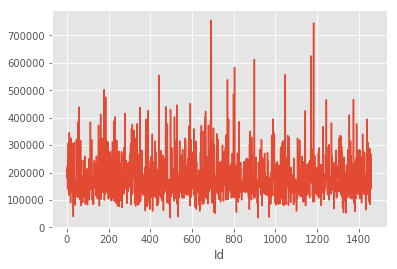

In [143]:
df.SalePrice.plot()

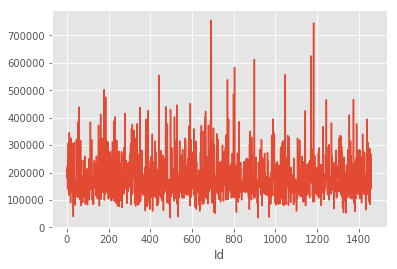

In [144]:
df.SalePrice.plot.line()

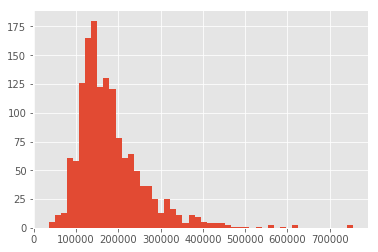

In [145]:
df.SalePrice.hist(bins=50)

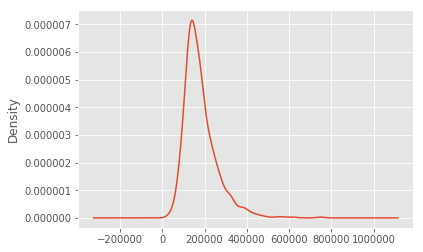

In [146]:
df.SalePrice.plot.density()

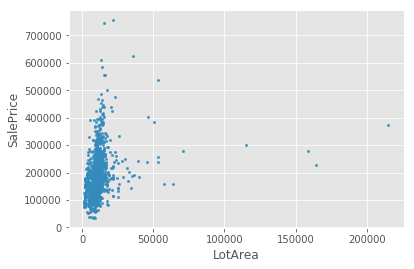

In [147]:
df.plot.scatter('LotArea', 'SalePrice', marker='.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f016a1e48>,
      dtype=object)

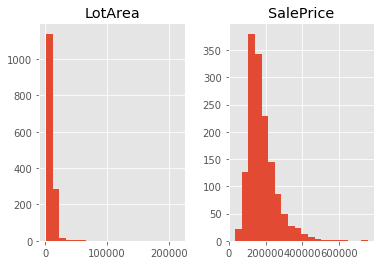

In [148]:
df[['SalePrice', 'LotArea']].hist(bins=20)